# PROJECT 1: Pima Indians Diabetes EDA

## Summary
Data sourced from Kaggle, originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

"The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset."

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

##### The genetical study of type 2 diabetes in the Pima Indian community:
To reduce the intricacy of type 2 diabetes, the disease has been studied within societies of limited genetic and environmental variance. Pima Indians of Arizona have the greatest number of reported daibetes of any other population globally. This dataset stems from such a study. 

## Perform EDA on the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


##### Read and preview the first 10 rows of the csv

In [2]:
pi_diabetes = pd.read_csv('pima_indians_diabetes.csv')
pi_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Dataframe dimensions and statistical exploration

In [3]:
pi_diabetes.shape

(768, 9)

- 768 rows of data/ test subjects
- 9 defined columns of associated informative categories

In [4]:
pi_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The dataset establishes multiple predictor variables that lead to one target variable,'Outcome'. 
##### Attribute information:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fol thickness (mm)
- Insulin: 2hr serum insulin(mu U/ml)
- BMI: Body Mass Index
- DiabetesPedigreeFunction: Diabetes Pedigree Function
- Age: Age in years
- Outcome: Class variable (0=no diabetes present, 1=diabetes present)

In [5]:
pi_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
pi_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pi_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Questionable descriptors:
- note the minimum values, will have to look into unrealistic "0" values (glucose, blood pressure, skin thickness, insulin, BMI)
- note the maximum values, observe potential unrealistic pregnancies (17) and insulin (846). Check distributions to see if outliers are significant.

### Data Cleaning

##### Quick correlation analysis before data cleaning for future comparison

In [8]:
diabetes_corrmatrix = pi_diabetes.corr()
diabetes_corrmatrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


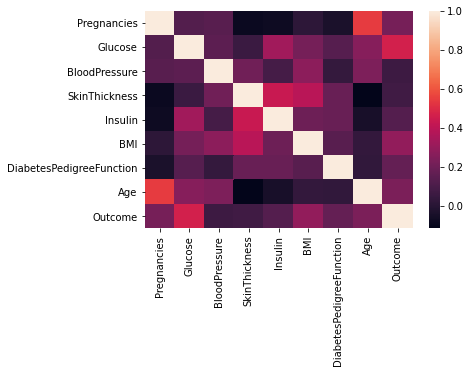

In [9]:
sns.heatmap(diabetes_corrmatrix)

##### Check for null values

In [10]:
pi_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Nulls, however will need to rectify the unrealistic "0" values within the data before analysis.

##### Visually depicting outliers for predictor variables

Text(0.5, 1.0, 'Test Patient Blood Pressure Distribution')

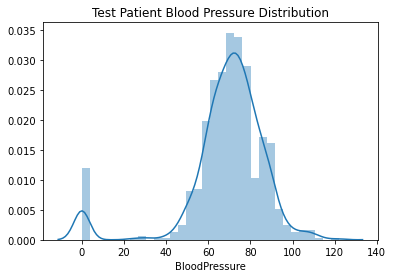

In [11]:
sns.distplot(pi_diabetes['BloodPressure'])
plt.title('Test Patient Blood Pressure Distribution')

- blood pressue "0" values are clear outliers of an otherwise close to normal distribution

Text(0.5, 1.0, 'Test Patient Skin Thickness Distribution')

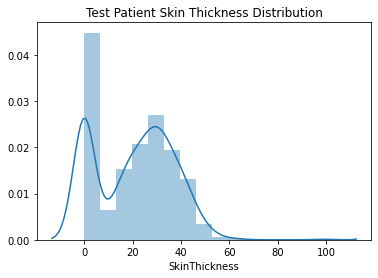

In [12]:
sns.distplot(pi_diabetes['SkinThickness'])
plt.title('Test Patient Skin Thickness Distribution')

- skin thickness "0" values are clear outliers outside of the distribution. It can also be logically stated that the skin fol thickness of the test subjects cannot be 0mm. 

Text(0.5, 1.0, 'Test Patient Insulin Distribution')

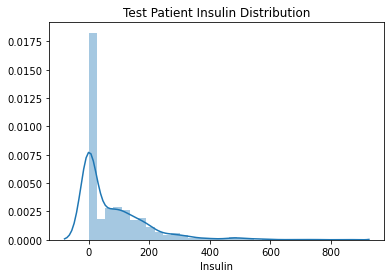

In [13]:
sns.distplot(pi_diabetes['Insulin'])
plt.title('Test Patient Insulin Distribution')

- Again, logically and visually, insulin levels of 0 should be dealt with as unrealistic data. 
- note: I plotted various distributions but the above three were the  ones with significant outliers. (Pregnancies maximum of 17 sounds unrealistic but not entirely impossible?). 

##### Create amended dataframe without unreliable "0" values for Blood Pressure, Skin Thickness and Insuline data

In [14]:
pi_diabetes_amend = pi_diabetes.drop(pi_diabetes[pi_diabetes['BloodPressure'and'SkinThickness'and'Insulin']==0].index)

Text(0.5, 1.0, 'Test Patient Blood Pressure Distribution (Amended)')

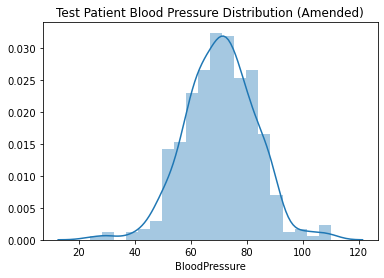

In [15]:
sns.distplot(pi_diabetes_amend['BloodPressure'])
plt.title('Test Patient Blood Pressure Distribution (Amended)')

Text(0.5, 1.0, 'Test Patient Skin Thickness Distribution (Amended)')

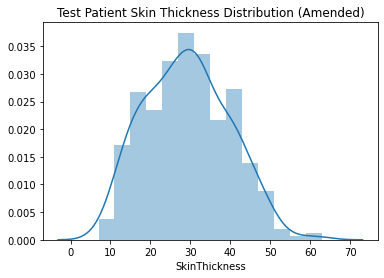

In [16]:
sns.distplot(pi_diabetes_amend['SkinThickness'])
plt.title('Test Patient Skin Thickness Distribution (Amended)')

Text(0.5, 1.0, 'Test Patient Insulin Distribution (Amended)')

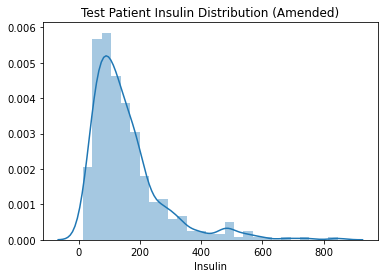

In [17]:
sns.distplot(pi_diabetes_amend['Insulin'])
plt.title('Test Patient Insulin Distribution (Amended)')

In [18]:
pi_diabetes_amend.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- as can be seen, the unreliable rows of data have been removed to create an amended dataframe. This reduces elimination/ loss of data but will allow us to work with figures that are unbiased to outliers.

### Variables of Interest
##### Amended numeric and visual correlations

In [19]:
diabetes_corrmatrix_amend = pi_diabetes_amend.corr()
diabetes_corrmatrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Pima Indians Outcome Correlation Heat Map')

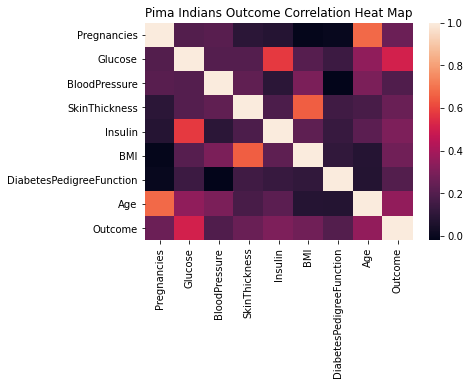

In [20]:
sns.heatmap(diabetes_corrmatrix_amend)
plt.title('Pima Indians Outcome Correlation Heat Map')

- In both the corr. matrix and the heat map it can be instantly detected that there has been an intensity in corrolations between values associated with the amended data. Clear correlations are seen between skin thickness/BMI (0.39), insulin/glucose (0.33), insulin/skin thickness (0.44), age/pregnancies (0.54 - logical) and most importantly - the target variable, Outcome, and glucose (0.47)

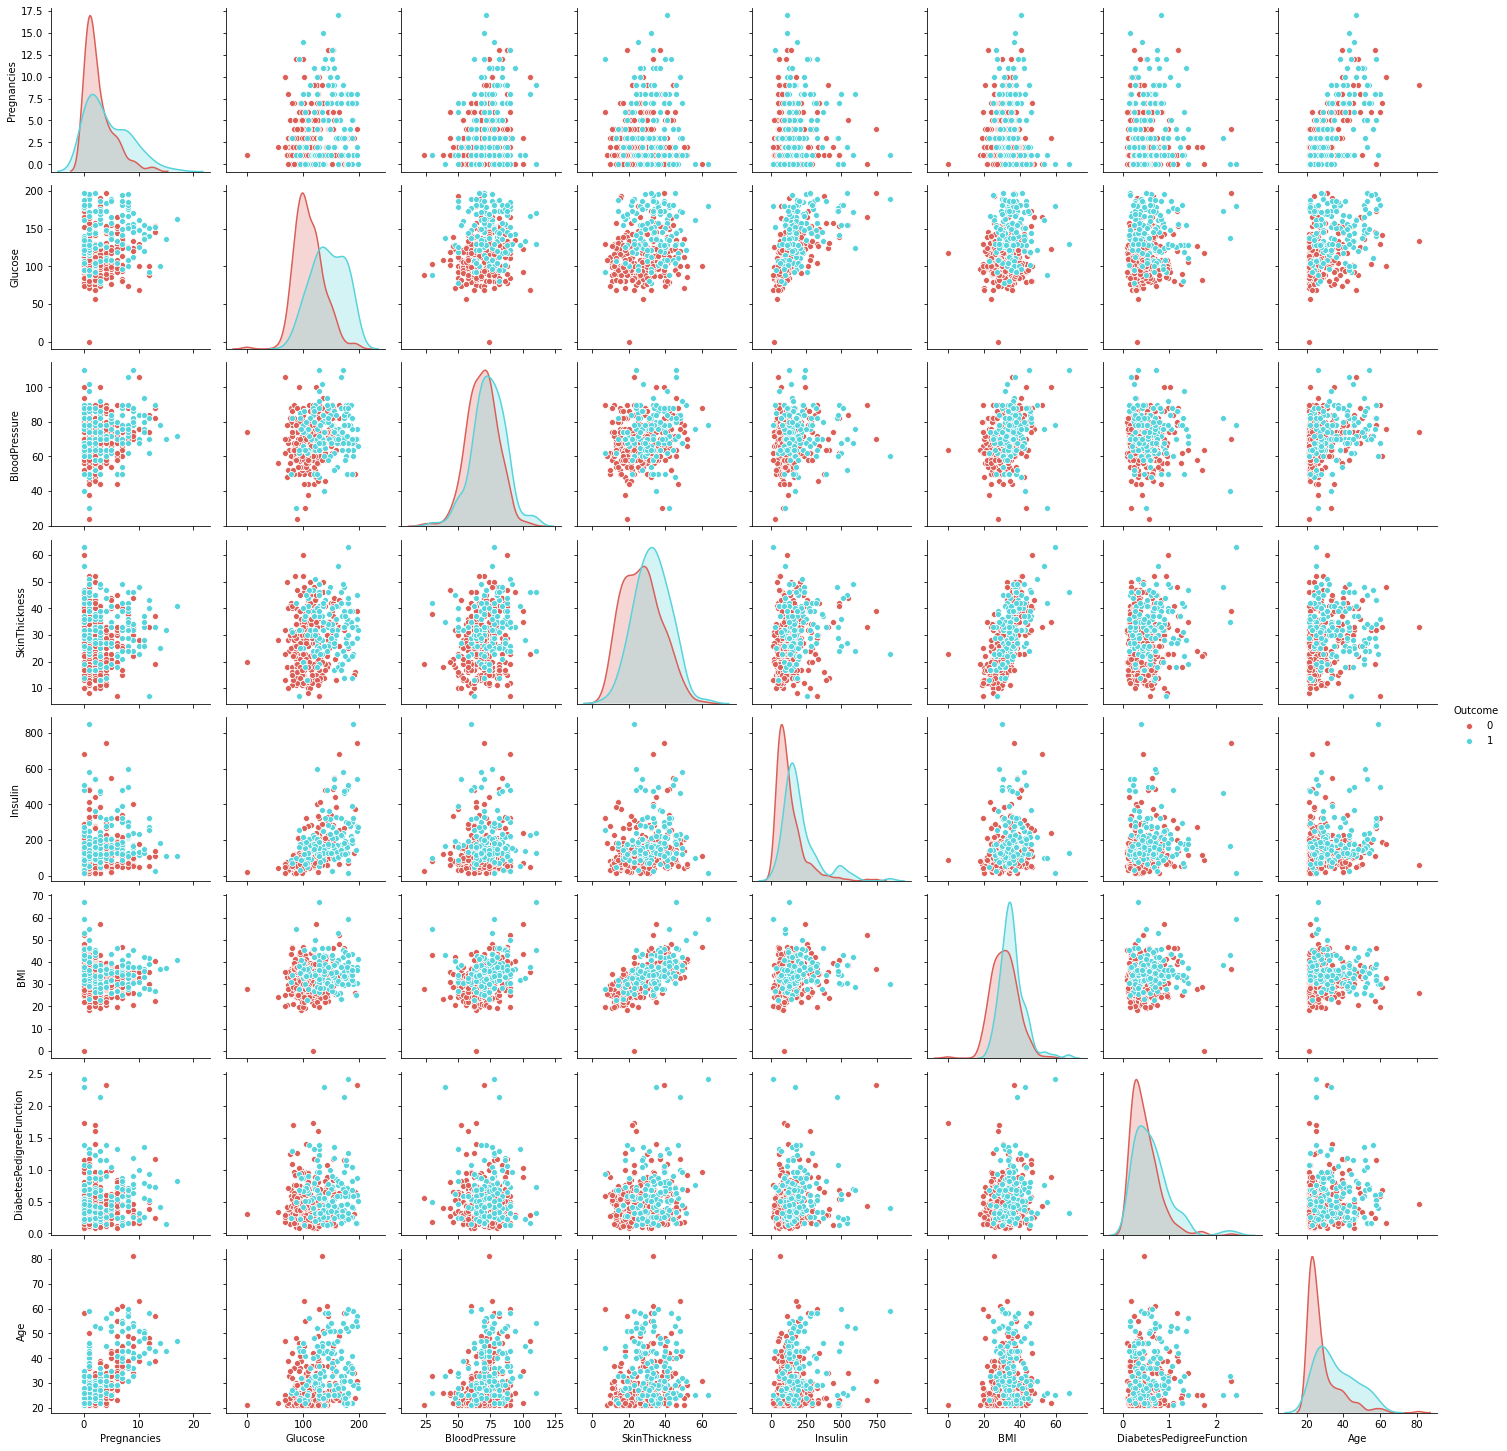

In [21]:
sns.pairplot(pi_diabetes_amend, hue='Outcome', palette="hls")

SUMMARY:
- The pairplot simply reiterates the numerical findings of the correlation matrix in visual form, with the distinction of outcome coded in color. We can asses features or predictor variables that could be of exploral interest, as those mentioned above. 
- See the Glucose KDE, top left. This one stood out because with the Outcome hue on the predictor variable you can see there may be something worth exploring.

##### Proportion of diabetes outcome
- note: the analysis of outome proportion is of the full original, unamended dataframe as it doesn't involve the original outliers

Diabetes outcome count:

In [22]:
pi_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Diabetes outcome count visual:

Text(0.5, 1.0, 'Test Patient Outcome')

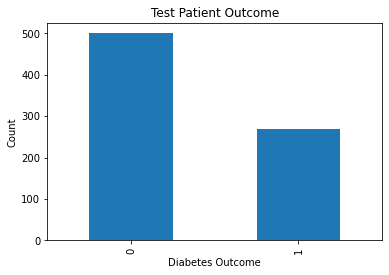

In [23]:
pi_diabetes['Outcome'].value_counts().plot(kind='bar')
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.title("Test Patient Outcome")

Diabetes outcome rate (percentage):

In [24]:
pi_diabetes['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Diabetes outcome rate visual:

Text(0.5, 1.0, 'Test Patient Outcome')

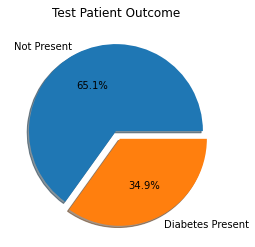

In [25]:
plt.pie(pi_diabetes['Outcome'].value_counts(), explode=(0,0.1), labels=["Not Present","Diabetes Present"], autopct='%1.1f%%', shadow=True)
plt.title("Test Patient Outcome")

Summary:
- Out of 768 test subjects 268 (34.90%) had diabetes, 500 (65.10%) did not

##### Categorization of age groups
For later analysis I would like to insert a column within the orignal dataframe with appropiately binned age groups

In [26]:
pi_diabetes['Age'].value_counts().head(15)

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
Name: Age, dtype: int64

Visualising the distribution of Age within the dataframe:

Text(0.5, 1.0, 'Test Patient Age Distribution')

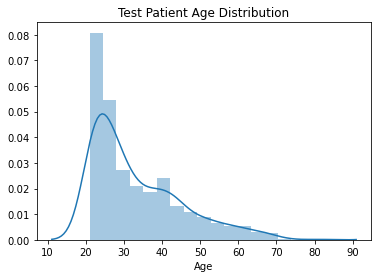

In [27]:
sns.distplot(pi_diabetes['Age'])
plt.title('Test Patient Age Distribution')

Distribution Notes:
- heavily right (positive) skewed, as most of the data is positioned to the left of the plot (younger), whilst outliers remain to the right (older). 

Creating a new column of binned ages and adding them to the original dataframe:

In [28]:
age_groups = pd.cut(pi_diabetes['Age'], bins=[0,30,40,50,60,70,85], labels = ['20s','30s','40s','50s','60s','70+'])
# Add age bins to the dataframe, after 'Age'
pi_diabetes.insert(8,'Age Group',age_groups)

In [29]:
pi_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age Group,Outcome
0,6,148,72,35,0,33.6,0.627,50,40s,1
1,1,85,66,29,0,26.6,0.351,31,30s,0
2,8,183,64,0,0,23.3,0.672,32,30s,1
3,1,89,66,23,94,28.1,0.167,21,20s,0
4,0,137,40,35,168,43.1,2.288,33,30s,1


- a new 'Age Group' colomn has been succesfully added to the original dataframe

##### Analysis of age group and diabetes outcome

Proportional visual of age groups (oringal dataset):

Text(0.5, 1.0, 'Test Patient Age')

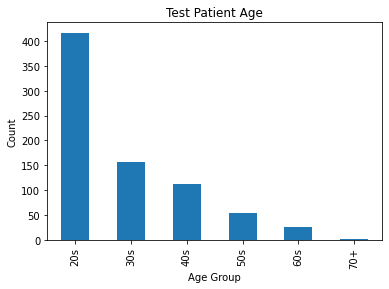

In [30]:
pi_diabetes['Age Group'].value_counts().plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Test Patient Age")

- To reiterate, there is a strong bias in the sample towards female in there 20s - of which none are under the age of 21.
- This strongly skews the data, which is a significant constraint when making inferences from the sample to a larger dataset (i.e. female population of Pima Indian Heritage, or even more inaccurately so, any outcome predictions for wider gender/ethnic groups).

Proportion of Pima Indian females with diabetes, grouped by Age:

In [31]:
age_diabetes_groupby = pi_diabetes.groupby('Age Group')['Outcome'].mean()
print(age_diabetes_groupby)

Age Group
20s    0.215827
30s    0.484076
40s    0.566372
50s    0.574074
60s    0.280000
70+    0.000000
Name: Outcome, dtype: float64


Visually in a bar plot:

Text(0.5, 1.0, 'Proportion of Diabetes Present in Age Groups')

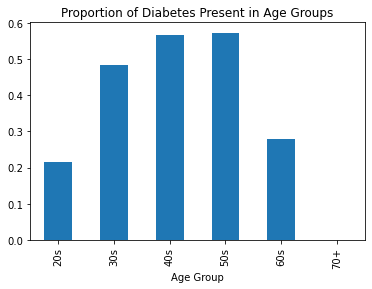

In [32]:
age_diabetes_groupby.plot(kind='bar')
plt.xlabel("Age Group")
plt.title("Proportion of Diabetes Present in Age Groups")

- Clear positive trend between age and diabetes, as the older the test subject, the more likely they had a diagnostic outcome. This is exclusive of test patients aged 60+, HOWEVER, the lack of sample size toward older test subjects skews this data. The bias within the sample towards woman under 30 years of age softens any age related claims. 
- If I were to conduct further tests, you would need more evenly distributed age data to see whether the proportion of diabetes would continue to increase. LOGICALLY, this should be the case as with age, diagnosis accumulates. 

In [33]:
pi_diabetes[pi_diabetes['Age'] > 60].shape[0]

27

- this count confirms that there are only 27 test patients (rows) out of the original 768 that are above the age of 60.

##### Visualizing correlations of interest, with a distiction of outcome
In order of correlation:
- Age and Pregnancies (0.54 - self explanatory)
- Outcome and Glucose (0.47)
- Skin Thickness and Insulin (0.44)
- Skin Thickness and BMI (0.39)
- Insuline and Glucose (0.33)

Multivariate Scatterplot of Age and Pregnancies, with Outcome distinction:

Text(0.5, 1.0, 'Outcome Identification on Age and Pregnancy (LinReg)')

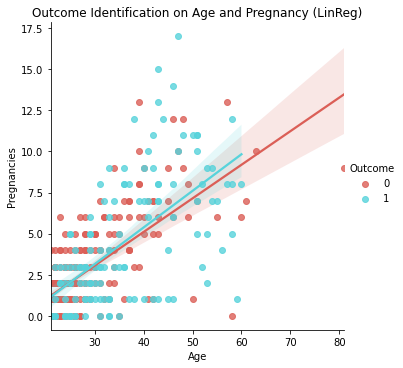

In [34]:
sns.lmplot(x='Age', y= 'Pregnancies', data=pi_diabetes_amend, hue='Outcome', palette="hls", fit_reg=True)
plt.title('Outcome Identification on Age and Pregnancy (LinReg)')

- linear regressions and colour mapping for the scatterplot identifies the distinction between those that had diabetes and those that did not.
-  Significant positive correlation. This is an obvious outcome, as it was expected that as women get older, they are more likely to have had multiple pregnancies.
- Regarding the distinction of diabetes across this particular correlation, the outcome seems rather unaffected in this model.

Distribution of Glucose levels, with Outcome Distinction:

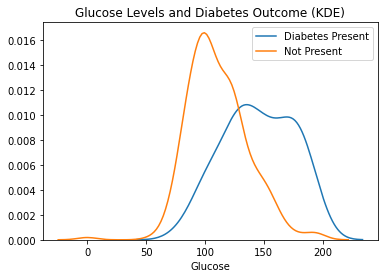

In [35]:
sns.distplot(pi_diabetes_amend[pi_diabetes_amend.Outcome==1]['Glucose'], hist=False,kde=True,label='Diabetes Present')
sns.distplot(pi_diabetes_amend[pi_diabetes_amend.Outcome==0]['Glucose'], hist=False,kde=True,label='Not Present')
plt.legend(loc='best')
plt.title('Glucose Levels and Diabetes Outcome (KDE)')
plt.show()

- KDE (kernel density estimate) is relative to a histogram. It can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.
- The level of glucose in the test patient was positively correlated with diabetes as an outcome. As depoicted visually in the KDE, the higher the level of glucose, the greater the proportion of diabetes diagnosis.
- Aside from Pregnacy/Age (logical), these two variables (Glucose/Outcome) had highest correlation within the dataset.

Multivariate Scatterplot of Skin Thickness and Insulin, with Outcome distinction:

Text(0.5, 1.0, 'Outcome Identification on Skin Thickness and Insulin (LinReg)')

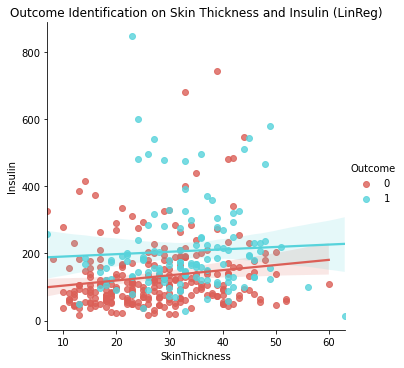

In [36]:
sns.lmplot(x='SkinThickness', y= 'Insulin', data=pi_diabetes_amend, hue='Outcome', palette="hls", fit_reg=True)
plt.title('Outcome Identification on Skin Thickness and Insulin (LinReg)')

- As previously noted in the correlation matrix, skin thickness and insulin is positively correlated (only slightly). 
- With regards to an outcome of diabetes, you can see skin thickness is distributed relatively evenly. Insulin levels link to diabetes, however, did cluster higher up in the figure. 

Multivariate Scatterplot of Skin Thickness and BMI, with Outcome distinction:

Text(0.5, 1.0, 'Outcome Identification on Skin Thickness and BMI (LinReg)')

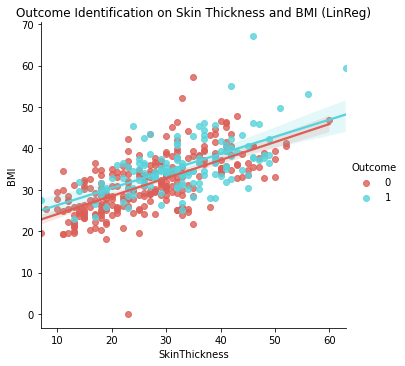

In [37]:
sns.lmplot(x='SkinThickness', y= 'BMI', data=pi_diabetes_amend, hue='Outcome', palette="hls", fit_reg=True)
plt.title('Outcome Identification on Skin Thickness and BMI (LinReg)')

- rather strong, positive correlation between BMI and Skin Thickness, as denotated by the linear regression, indicating that the higher the BMI is met with an increase in skin thickness
- Diabetes as an outcome tends to positively follow this correlation.

Multivariate Scatterplot of Insulin and Glucose, with Outcome distinction:

Text(0.5, 1.0, 'Outcome Identification on Insulin and Glucose (LinReg)')

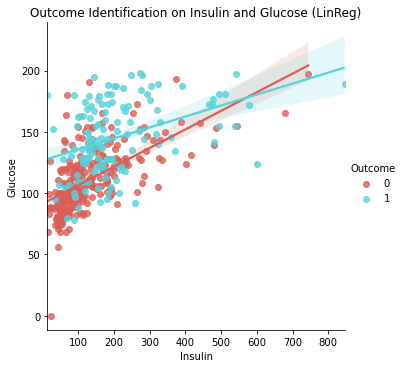

In [38]:
sns.lmplot(x='Insulin', y= 'Glucose', data=pi_diabetes_amend, hue='Outcome', palette="hls", fit_reg=True)
plt.title('Outcome Identification on Insulin and Glucose (LinReg)')

- stong, positive correlation between glucose and insuline.
- those with a diabetic outcome tended to have both higher insulin and glucose levels that those that did not have a diagnosis. 